In [1]:
#KÜTÜPHANELER

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow.keras.models as Models
import tensorflow.keras.layers as Layers
import tensorflow.keras.optimizers as Optimizer

In [2]:
#Veriyi Yükleme

df = pd.read_csv("creditcard.csv")

#Veri Kaynağı: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [3]:
pd.set_option('display.max_columns', None)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Eksik Veri Kontrolü

print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


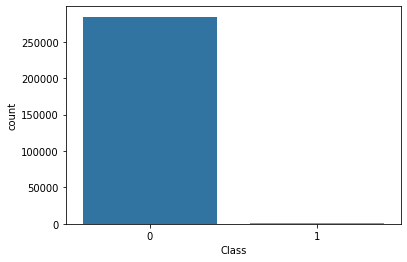

In [5]:
#Hedef Değişkendeki Sınıfların Görselleştirilmesi

sns.countplot(df.Class);

Class sütununda çok büyük bir dengesizlik var. Bu çalışmada amaç, sahte alışverişleri tespit etmek. Hedef sınıftaki bu denli çarpıklık kurduğumuz modelleri yanıltacaktır. Belki yine doğruluk oranları yüksek olacaktır ancak sahte alışverişi tespit etmekte iyi olmayacaktır. Çünkü verinin geneli sahte olmayan alışverişdir ve model bunu öğrenir. Aşırı ezberlermeye (Overfitting) yol açabilir bu denli dengesizlik. Makine öğrenmesi süreçlerinde amaç genelleme yapabilmeyi sağlamaktır. Bu sebeplerden ötürü Class sütunu değeri 0'a eşit olan verilerden Class sütunu değeri 1'e eşit olanını kadarını rastgele seçip modeldeki hedef değişkendeki çarpıklığı önlüyoruz

In [6]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
X = train_test_split(df[df.Class == 0], test_size = 492, random_state = 4)

df0 = pd.DataFrame(X[1])
df1 = df[df.Class == 1]

normal_df = pd.concat([df0, df1])

In [8]:
new_df = normal_df.sample(frac=1, random_state = 4)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
53794,46149.0,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,-3.364011,2.887048,-3.784460,-1.288904,-3.985626,0.531838,-2.603703,-5.157596,-0.696010,1.285961,0.221919,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1.00,1
157871,110552.0,-2.450367,2.107729,-5.140663,1.411304,-1.690780,-0.736427,-3.657946,1.944906,-0.788388,-5.624677,3.519642,-7.221590,1.201728,-3.811428,-1.701428,-3.571408,-7.311407,-1.754355,0.795449,-0.130438,0.800538,0.364617,0.233608,-0.282078,-0.320311,0.492920,0.359976,-0.115471,80.22,1
39183,39729.0,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,-1.965309,0.159744,-0.490697,-1.181977,-1.958876,1.152743,-1.341269,2.498325,0.777831,1.406045,1.784449,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,776.83,1
124036,77154.0,-0.715414,0.608590,1.155501,-0.267565,-0.563748,-0.618898,0.698308,0.069837,-0.133341,-1.025335,1.500629,-0.417898,-1.590295,-1.074999,0.288234,1.377769,0.223887,1.311073,-0.896072,-0.186978,0.130749,0.239389,-0.090227,0.411572,-0.216126,0.353896,-0.062361,0.008433,129.00,1
69644,53515.0,-0.958065,0.816749,1.764786,0.983298,-0.751082,0.394793,-0.565611,0.804178,0.108685,-0.185877,0.358119,0.703584,-0.305869,0.054320,-0.286488,0.167986,-0.179169,0.846151,0.960418,0.005882,0.027101,0.182440,-0.044085,-0.014467,0.132699,-0.309969,0.079119,-0.013875,12.99,0


In [9]:
new_df.shape

(984, 31)

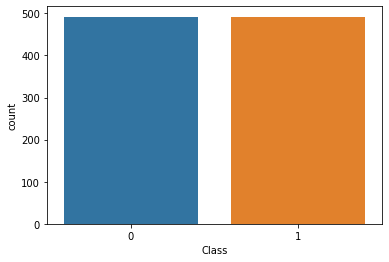

In [10]:
sns.countplot(new_df.Class);

In [11]:
scaler = StandardScaler()

scaled_Time = scaler.fit_transform(new_df["Time"].values.reshape(-1,1))
scaled_Amount = scaler.fit_transform(new_df["Amount"].values.reshape(-1,1))

new_df["scaled_Time"] = scaled_Time
new_df["scaled_Amount"] = scaled_Amount

new_df = new_df.drop(columns = {"Time", "Amount"})

new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Time,scaled_Amount
53794,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,-3.364011,2.887048,-3.784460,-1.288904,-3.985626,0.531838,-2.603703,-5.157596,-0.696010,1.285961,0.221919,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1,-0.875044,-0.453121
157871,-2.450367,2.107729,-5.140663,1.411304,-1.690780,-0.736427,-3.657946,1.944906,-0.788388,-5.624677,3.519642,-7.221590,1.201728,-3.811428,-1.701428,-3.571408,-7.311407,-1.754355,0.795449,-0.130438,0.800538,0.364617,0.233608,-0.282078,-0.320311,0.492920,0.359976,-0.115471,1,0.456890,-0.136723
39183,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,-1.965309,0.159744,-0.490697,-1.181977,-1.958876,1.152743,-1.341269,2.498325,0.777831,1.406045,1.784449,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,1,-1.007817,2.645479
124036,-0.715414,0.608590,1.155501,-0.267565,-0.563748,-0.618898,0.698308,0.069837,-0.133341,-1.025335,1.500629,-0.417898,-1.590295,-1.074999,0.288234,1.377769,0.223887,1.311073,-0.896072,-0.186978,0.130749,0.239389,-0.090227,0.411572,-0.216126,0.353896,-0.062361,0.008433,1,-0.233822,0.058100
69644,-0.958065,0.816749,1.764786,0.983298,-0.751082,0.394793,-0.565611,0.804178,0.108685,-0.185877,0.358119,0.703584,-0.305869,0.054320,-0.286488,0.167986,-0.179169,0.846151,0.960418,0.005882,0.027101,0.182440,-0.044085,-0.014467,0.132699,-0.309969,0.079119,-0.013875,0,-0.722706,-0.405234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219892,0.120301,1.974141,-0.434087,5.390793,1.289684,0.280590,0.221963,0.067827,-1.387054,-0.045125,0.195839,-0.629086,0.681222,-4.715521,-0.287876,0.497434,3.871618,1.492394,0.506040,0.205691,-0.038690,0.204554,-0.167313,0.791547,-0.223675,0.473223,-0.160202,0.065039,1,1.105722,-0.454080
95534,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,1.169425,-0.371672,-0.245677,1.375941,0.870457,-0.819319,-1.550904,0.125853,-0.397246,0.272377,1.226022,0.062908,-0.049502,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,1,-0.477778,-0.329669
221955,1.887225,-1.449215,-0.139307,-0.861318,-1.412395,-0.041161,-1.255357,0.072770,0.033011,0.785529,0.747559,0.611636,1.148448,-0.663241,-0.313445,1.749028,-0.413296,-0.515891,0.735172,0.288107,0.338102,0.789464,0.111406,-0.297992,-0.454191,-0.271566,0.017408,-0.026219,0,1.123011,0.049274
198029,-0.801287,-0.355584,0.997339,-3.332366,-0.064676,0.183281,-0.094492,0.063676,-2.261618,0.826249,-0.239217,-1.315742,-0.682582,-0.279033,-1.297041,-0.025150,-0.157791,0.775712,-0.105737,-0.466040,-0.169303,-0.246200,-0.353229,0.042940,0.753452,-0.152020,-0.243336,0.023658,0,0.906499,-0.397206


Veride Time ve Amount sütunları hariç diğer sütunlar zaten ölçeklendirildiğinden dolayı sadece bu 2 sütuna ölçeklendirme yapıyoruz.

In [12]:
X = new_df.drop(columns = "Class")
y = new_df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [13]:
from sklearn import metrics

In [14]:
from sklearn.tree import DecisionTreeClassifier

#Karar Ağacı Objesi
dectree = DecisionTreeClassifier()

#Modeli Eğitme
dectree_model = dectree.fit(X_train,y_train)

#Tahmin
dectree_y_pred = dectree_model.predict(X_test)

#Doğruluk
dectree_acc = metrics.accuracy_score(y_test, dectree_y_pred)
print("Accuracy:",dectree_acc)

Accuracy: 0.902027027027027


In [15]:
from sklearn.linear_model import LogisticRegression

#Lojistik Regresyon Objesi
logreg = LogisticRegression()

#Modeli Eğitme
logreg_model = logreg.fit(X_train,y_train)

#Tahmin
logreg_y_pred = logreg_model.predict(X_test)

#Doğruluk
logreg_acc = metrics.accuracy_score(y_test, logreg_y_pred)
print("Accuracy:",logreg_acc)

Accuracy: 0.9391891891891891


In [16]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Objesi
knn = KNeighborsClassifier()

#Modeli Eğitme
knn_model = knn.fit(X_train,y_train)

#Tahmin
knn_y_pred = knn_model.predict(X_test)

#Doğruluk
knn_acc = metrics.accuracy_score(y_test, knn_y_pred)
print("Accuracy:", knn_acc)

Accuracy: 0.9391891891891891


In [17]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes Objesi
nb = GaussianNB()

#Modeli Eğitme
nb_model = nb.fit(X_train,y_train)

#Tahmin
nb_y_pred = nb_model.predict(X_test)

#Doğruluk
nb_acc = metrics.accuracy_score(y_test, nb_y_pred)
print("Accuracy:", nb_acc)

Accuracy: 0.8986486486486487


In [18]:
from sklearn.svm import SVC

#Karar Ağacı Objesi
svc = SVC()

#Modeli Eğitme
svc_model = svc.fit(X_train,y_train)

#Tahmin
svc_y_pred = svc_model.predict(X_test)

#Doğruluk
svc_acc = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", svc_acc)

Accuracy: 0.9256756756756757


In [19]:
from sklearn.ensemble import RandomForestClassifier

#Karar Ağacı Objesi
ranfor = RandomForestClassifier()

#Modeli Eğitme
ranfor_model = ranfor.fit(X_train,y_train)

#Tahmin
ranfor_y_pred = ranfor_model.predict(X_test)

#Doğruluk
ranfor_acc = metrics.accuracy_score(y_test, ranfor_y_pred)
print("Accuracy:", ranfor_acc)

Accuracy: 0.9324324324324325


In [20]:
#Neural Network

model = Models.Sequential()

model.add(Layers.Dense(256, activation = 'relu', input_shape = (X_train.shape[1], )))
model.add(Layers.Dense(128, activation = 'relu'))
model.add(Layers.Dense(64, activation = 'relu'))
model.add(Layers.Dense(32, activation = 'relu'))
model.add(Layers.Dense(2, activation = 'softmax'))

model.compile(optimizer = Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7936      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 51,234
Trainable params: 51,234
Non-trainable params: 0
_________________________________________________________________


In [21]:
trained = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
22/22 [==============================] - 0s 1ms/step - loss: 0.6336 - accuracy: 0.6642
Epoch 2/30
22/22 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8241
Epoch 3/30
22/22 [==============================] - 0s 938us/step - loss: 0.3620 - accuracy: 0.9041
Epoch 4/30
22/22 [==============================] - 0s 1ms/step - loss: 0.3115 - accuracy: 0.9302
Epoch 5/30
22/22 [==============================] - 0s 952us/step - loss: 0.2712 - accuracy: 0.9331
Epoch 6/30
22/22 [==============================] - 0s 986us/step - loss: 0.2375 - accuracy: 0.9346
Epoch 7/30
22/22 [==============================] - 0s 969us/step - loss: 0.2104 - accuracy: 0.9404
Epoch 8/30
22/22 [==============================] - 0s 993us/step - loss: 0.1893 - accuracy: 0.9419
Epoch 9/30
22/22 [==============================] - 0s 1000us/step - loss: 0.1718 - accuracy: 0.9433
Epoch 10/30
22/22 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.9448
Epoch 

In [22]:
nn_acc = model.evaluate(X_test, y_test, verbose=1)[1]

10/10 [==============================] - 0s 698us/step - loss: 0.1821 - accuracy: 0.9392
